# Documentation

__[wfdb](https://wfdb.readthedocs.io/en/latest/)__

---

__[scikit-FDA](https://fda.readthedocs.io/en/latest/)__

---

__[HeartPy](https://python-heart-rate-analysis-toolkit.readthedocs.io/en/latest/index.html)__

---

__[ecg_plot](https://pypi.org/project/ecg-plot/)__ --not working

---

In [1]:
import pandas as pd
import numpy as np
import wfdb
from wfdb import processing
import ast
import ecg_plot
from scipy import stats
import skfda

# 1. Loading annotation data

In [2]:
def load_raw_data(df, sampling_rate, path):
    if sampling_rate == 100:
        data = [wfdb.rdsamp(path+f) for f in df.filename_lr]
    else:
        data = [wfdb.rdsamp(path+f) for f in df.filename_hr]
    data = np.array([signal for signal, meta in data])
    return data

In [3]:
def aggregate_diagnostic(y_dic):
    tmp = []
    for key in y_dic.keys():
        if key in agg_df.index:
            tmp.append(agg_df.loc[key].diagnostic_class)
    return list(set(tmp))

In [4]:
path = ''
sampling_rate = 500

In [5]:
# Load and convert annotation data
Y = pd.read_csv(path+'ptbxl_database.csv', index_col='ecg_id')
Y.scp_codes = Y.scp_codes.apply(lambda x: ast.literal_eval(x))

In [6]:
# Load scp_statements.csv for diagnostic aggregation
agg_df = pd.read_csv('scp_statements.csv', index_col=0)
agg_df = agg_df[agg_df.diagnostic == 1]

In [7]:
# Apply diagnostic superclass
Y['diagnostic_superclass'] = Y.scp_codes.apply(aggregate_diagnostic)

In [8]:
Y.describe()

,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,21837.000000,21748.000000,21837.000000,6983.000000,9429.000000,20328.000000,21819.000000,12426.000000,21837.000000
mean,11255.005953,59.836307,0.478912,166.708292,70.997561,2.292503,1.547229,0.747948,5.505335
std,6234.132489,16.953125,0.499567,10.864935,15.875146,3.254786,4.169753,1.183269,2.875306
min,302.000000,2.000000,0.000000,6.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,5982.000000,50.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,11423.000000,62.000000,0.000000,166.000000,70.000000,1.000000,1.000000,1.000000,6.000000
75%,16614.000000,72.000000,1.000000,174.000000,80.000000,3.000000,2.000000,1.000000,8.000000
max,21797.000000,95.000000,1.000000,209.000000,250.000000,11.000000,50.000000,11.000000,10.000000


In [9]:
pd.set_option('display.max_columns', None)
Y.tail(20)

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
21818,19204.0,84.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-03 12:09:05,sinusrhythmus linkstyp mÄssige amplitudenkrite...,"{'NORM': 100.0, 'ABQRS': 0.0, 'VCLVH': 0.0, 'S...",LAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/21000/21818_lr,records500/21000/21818_hr,[NORM]
21819,9843.0,54.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-03-03 12:12:58,sinusrhythmus p-sinistrocardiale ueberdrehter ...,"{'IRBBB': 100.0, 'LAFB': 100.0, 'SR': 0.0}",ALAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,10,records100/21000/21819_lr,records500/21000/21819_hr,[CD]
21820,18655.0,80.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-03 17:34:11,sinusrhythmus p-sinistrocardiale linkstyp unsp...,"{'IMI': 15.0, 'SR': 0.0}",LAD,unknown,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/21000/21820_lr,records500/21000/21820_hr,[MI]
21821,8382.0,53.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-05 12:31:07,sinusrhythmus linkstyp unvollstÄndiger rechtss...,"{'NORM': 80.0, 'IRBBB': 100.0, 'SR': 0.0}",LAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,6,records100/21000/21821_lr,records500/21000/21821_hr,"[NORM, CD]"
21822,15134.0,55.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-03-06 12:06:03,sinusrhythmus lagetyp normal normales ekg 4.46...,"{'NORM': 100.0, 'SR': 0.0}",MID,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,7,records100/21000/21822_lr,records500/21000/21822_hr,[NORM]
21823,18689.0,80.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-06 18:57:06,"sinusrhythmus linkstyp st & t abnorm, wahrsche...","{'NORM': 50.0, 'SR': 0.0}",LAD,NaN,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,3,records100/21000/21823_lr,records500/21000/21823_hr,[NORM]
21824,19977.0,69.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-10 08:10:23,sinusrhythmus p-sinistrocardiale lagetyp norma...,"{'AMI': 15.0, 'ABQRS': 0.0, 'SR': 0.0}",MID,unknown,NaN,1.0,False,True,True,NaN,NaN,NaN,NaN,NaN,NaN,8,records100/21000/21824_lr,records500/21000/21824_hr,[MI]
21825,11197.0,59.0,0,NaN,NaN,1.0,2.0,AT-60 3,2001-05-12 11:07:26,sinusrhythmus lagetyp normal normales ekg 4.46...,"{'NORM': 100.0, 'SR': 0.0}",MID,NaN,NaN,1.0,False,True,True,NaN,", alles,",NaN,NaN,NaN,NaN,3,records100/21000/21825_lr,records500/21000/21825_hr,[NORM]
21826,9178.0,82.0,1,NaN,NaN,1.0,2.0,AT-60 3,2001-05-13 18:20:52,sinus arrhythmie ueberdrehter linkstyp linksan...,"{'IMI': 80.0, 'ABQRS': 0.0, 'SARRH': 0.0}",ALAD,unknown,NaN,1.0,False,True,True,NaN,", I-AVF,",NaN,NaN,NaN,NaN,10,records100/21000/21826_lr,records500/21000/21826_hr,[MI]


# 2. Data selection

In [10]:
# Select 'NORM' ECGs only
Y_norm = Y[Y.diagnostic_superclass.apply(lambda lst: any(d == 'NORM' for d in lst))]

In [11]:
Y_norm.describe()

,patient_id,age,sex,height,weight,nurse,site,validated_by,strat_fold
count,9528.000000,9522.000000,9528.000000,3257.000000,5267.000000,8968.000000,9518.000000,5427.000000,9528.000000
mean,11177.749685,52.159735,0.538623,167.077986,71.298652,2.412355,1.569237,0.729501,5.498111
std,6250.410289,17.305979,0.498532,10.742007,15.210457,3.295274,4.483843,1.190244,2.878418
min,306.000000,2.000000,0.000000,66.000000,5.000000,0.000000,0.000000,0.000000,1.000000
25%,5754.750000,40.000000,0.000000,160.000000,60.000000,0.000000,0.000000,0.000000,3.000000
50%,11220.500000,54.000000,1.000000,166.000000,70.000000,1.000000,1.000000,0.000000,5.000000
75%,16614.500000,65.000000,1.000000,175.000000,80.000000,4.000000,2.000000,1.000000,8.000000
max,21796.000000,94.000000,1.000000,209.000000,200.000000,11.000000,50.000000,10.000000,10.000000


In [12]:
# Drop all NaN values in column 'age' since from the count some values are missing
Y_age = Y_norm.dropna(subset=['age'])

In [13]:
# Select all healthy subjects between 30 and 50 years
Y_age = Y_age[(Y_age['age'] >= 30) & (Y_age['age'] <= 50)]

In [14]:
# Test what would be the datsete of intersection between known heights and weights
Y_bmi = Y_age.dropna(subset=['height', 'weight'])
print(Y_bmi.shape[0])

909


In [15]:
# select few records as example
df_Y = Y_age[:3]
df_Y.head()

,patient_id,age,sex,height,weight,nurse,site,device,recording_date,report,scp_codes,heart_axis,infarction_stadium1,infarction_stadium2,validated_by,second_opinion,initial_autogenerated_report,validated_by_human,baseline_drift,static_noise,burst_noise,electrodes_problems,extra_beats,pacemaker,strat_fold,filename_lr,filename_hr,diagnostic_superclass
ecg_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3,20372.0,37.0,1,NaN,69.0,2.0,0.0,CS-12 E,1984-11-15 12:49:10,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,5,records100/00000/00003_lr,records500/00000/00003_hr,[NORM]
12,11031.0,43.0,1,NaN,44.0,2.0,0.0,CS-12 E,1984-12-21 08:02:26,sinusbradykardie sonst normales ekg,"{'NORM': 80.0, 'SBRAD': 0.0}",NaN,NaN,NaN,NaN,False,False,True,NaN,NaN,NaN,NaN,NaN,NaN,8,records100/00000/00012_lr,records500/00000/00012_hr,[NORM]
16,10999.0,49.0,0,NaN,79.0,2.0,0.0,CS-12 E,1985-01-16 08:27:38,sinusrhythmus normales ekg,"{'NORM': 100.0, 'SR': 0.0}",NaN,NaN,NaN,NaN,False,False,True,", V1",NaN,NaN,NaN,NaN,NaN,6,records100/00000/00016_lr,records500/00000/00016_hr,[NORM]


# 3. Loading raw data

# 3.1 Raw data structure

In [16]:
# Load raw signal data
df_X = load_raw_data(df_Y, sampling_rate, path)

In [17]:
# Load raw signal data
#X = load_raw_data(Y_norm, sampling_rate, path)

`df_X` is a <i>N * 5000 * 12</i>

`len(df_X) = 3`
`len(df_X[0]) = 5000`
`len(df_X[0][0]) = 12`


In [18]:
ecg = np.asmatrix(df_X[0]).transpose()
ecg.shape

(12, 5000)

In [19]:
filename = "records500/00000/00003_hr"
signals, fields = wfdb.rdsamp(filename)
display(signals)
display(fields)

array([[-0.035, -0.07 , -0.035, ..., -0.1  , -0.075, -0.065],
       [-0.035, -0.07 , -0.035, ..., -0.1  , -0.075, -0.065],
       [-0.035, -0.07 , -0.035, ..., -0.1  , -0.075, -0.065],
       ...,
       [-0.04 , -0.18 , -0.14 , ..., -0.015,  0.02 ,  0.025],
       [-0.04 , -0.18 , -0.14 , ..., -0.015,  0.02 ,  0.025],
       [-0.04 , -0.18 , -0.14 , ..., -0.015,  0.02 ,  0.025]])

{'fs': 500,
 'sig_len': 5000,
 'n_sig': 12,
 'base_date': None,
 'base_time': None,
 'units': ['mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV',
  'mV'],
 'sig_name': ['I',
  'II',
  'III',
  'AVR',
  'AVL',
  'AVF',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6'],
 'comments': []}

`record = wfdb.rdrecord(filename)`<br>
`signals, fields = wfdb.rdsamp(filename)`

<ul> Record class:
<li><i>p_signal</i> (priority) or <i>d_signal</i> attribute, signal values as N x M array where:
    <ul>
    <li>N = <i>sig_len</i></li>
    <li>M = <i>n_sig</i></li>
    </ul>
</li>
<li><i>fs</i>, sampling frequency</li>
<li><i>sig_len</i>, length of signal</li>
<li><i>n_sig</i>, number of leads</li> 
<li><i>sig_name</i>, signal name</li>
<li><i>units</i>, signal units</li> 
</ul>

# 4.2 Plotting

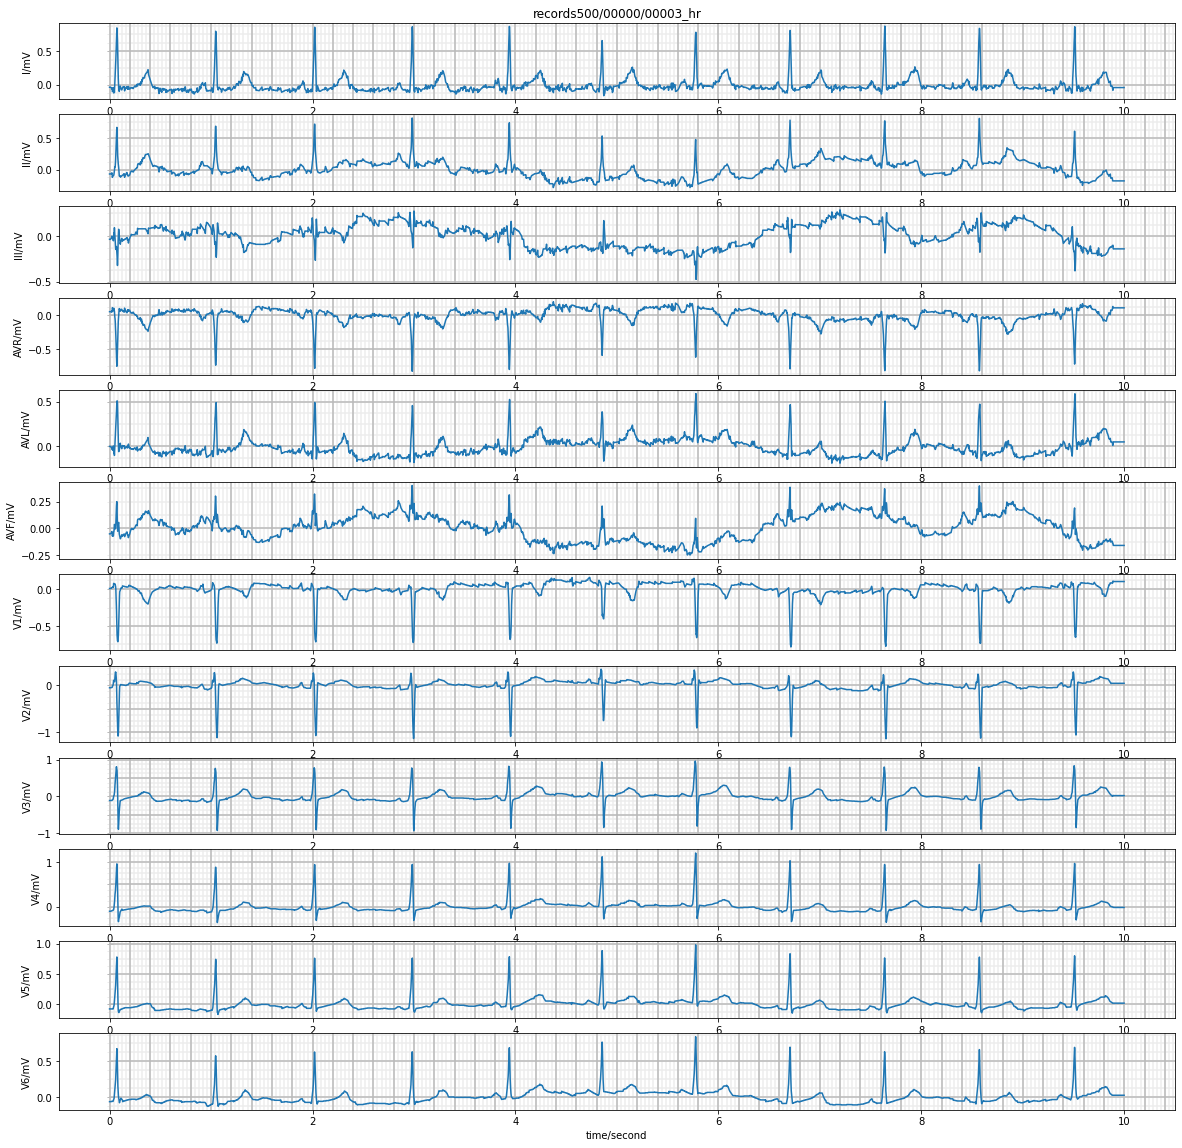

In [20]:
record = wfdb.rdrecord(filename)
wfdb.plot_wfdb(record=record, title=filename, time_units='seconds', figsize=(20,20), ecg_grids='all')

# 4. Processing

## 4.1 Resample

In [21]:
# resampled_x, resampled_t = processing.resample_sig(x, fs, fs_target)

## 4.2 Heart Rate

In [22]:
# heart_rate = processing.compute_hr(sig_len, qrs_inds, fs)

## 4.3 Peaks

In [23]:
# hard_peaks, soft_peaks = processing.find_peaks(sig)

In [24]:
# local_peaks = processing.find_loca_peaks(sig, radius)

In [25]:
# shifted_peak_inds = processing.correct_peaks(sig, peak_inds, search_radius, smoooth_window_size)

## 4.4 QRS Detectors

In [26]:
# xqrs = processing.XQRS(sig=sig[:,0], fs=fields['fs'])
# xqrs.detect()

# - or -

# qrs_inds = processing.xqrs_detect(sig=sig[:,0], fs=fields['fs'])

In [27]:
'''
type(X)
stats.describe(X)

# Split data into train and test
test_fold = 10
# Train
X_train = X[np.where(Y.strat_fold != test_fold)]
y_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass
# Test
X_test = X[np.where(Y.strat_fold == test_fold)]
y_test = Y[Y.strat_fold == test_fold].diagnostic_superclass
'''

'\ntype(X)\nstats.describe(X)\n\n# Split data into train and test\ntest_fold = 10\n# Train\nX_train = X[np.where(Y.strat_fold != test_fold)]\ny_train = Y[(Y.strat_fold != test_fold)].diagnostic_superclass\n# Test\nX_test = X[np.where(Y.strat_fold == test_fold)]\ny_test = Y[Y.strat_fold == test_fold].diagnostic_superclass\n'